In [1]:
# 导入 opencv-python
import cv2

# 导入可视化工具包 matplotlib，并让绘制的图像嵌入在 notebook 中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数，输入图像路径，可视化图像
def show_img_from_path(img_path):
    '''opencv 读入图像，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 定义可视化图像函数，输入图像 array，可视化图像
def show_img_from_array(img):
    '''输入 array，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [2]:
import os
# 根据本文件的位置重定位项目路径
os.chdir(r'/home/featurize/work/mmocr')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/maskrcnn/mask_rcnn_r50_fpn_160e_icdar2017_20210218-c6ec3ebb.pth


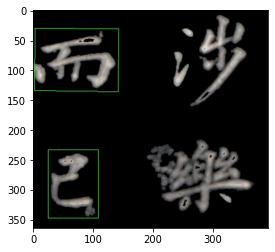

In [21]:
from mmocr.utils.ocr import MMOCR

my_ocr = {'det': 'MaskRCNN_IC17',
          'det_config':
          'configs/textdet/maskrcnn/mask_rcnn_r50_fpn_160e_icdar2017-stone.py',
          'det_ckpt':
          'demo/det/latest.pth',
          'recog': 'SAR',
          'recog_config':
          'configs/textrecog/sar/sar_r31_parallel_decoder_stone_dataset.py',
          'recog_ckpt':
          'demo/recog/latest.pth'}

# 导入模型到内存
ocr = MMOCR(det='MaskRCNN_IC17',
            recog=None)

# 推理
results = ocr.readtext('../../data/icdar2017/imgs/training/a142.jpg', output='demo/out/det_out.jpg', export='demo/', merge=False)
# 展示结果
show_img_from_path('demo/out/det_out.jpg')